In [33]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import time

In [2]:
! wget https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/taylor/cloud.data

--2021-11-09 17:33:48--  https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/taylor/cloud.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 209266 (204K) [application/x-httpd-php]
Saving to: ‘cloud.data’

cloud.data          100%[===================>] 204.36K   800KB/s    in 0.3s    

2021-11-09 17:33:49 (800 KB/s) - ‘cloud.data’ saved [209266/209266]



In [6]:
cloud = []

with open('cloud.data') as fid:
  for aline in fid:
    aline = aline.strip().split() # remove spaces in beginning and end
    try:
      l = list(map(float,aline))
      if l:
        cloud.append(l)
    except:
      continue
cloud = np.array(cloud)


Text(0.5, 1.0, 'Z normalized data')

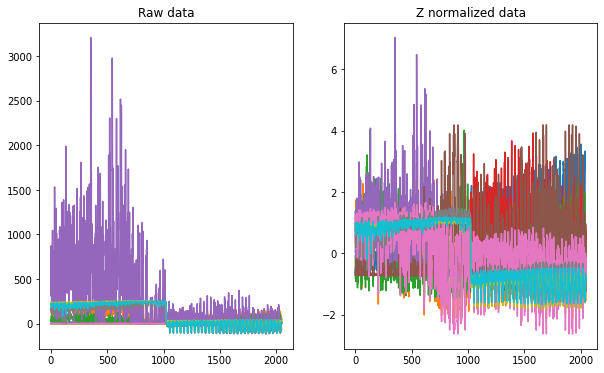

In [7]:
cloudz = np.zeros(cloud.shape)

for coli in range(cloud.shape[1]):
  mean = np.mean(cloud[:,coli])
  std = np.std(cloud[:,coli])
  cloudz[:,coli] = (cloud[:,coli]-mean) / std

fig , ax = plt.subplots(1,2, figsize = (10,6))
ax[0].plot(cloud)
ax[0].set_title('Raw data')

ax[1].plot(cloudz)
ax[1].set_title('Z normalized data')

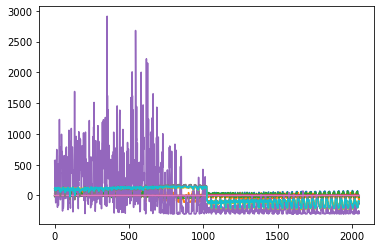

In [9]:
# mean center the data

cloud_demean = cloud-cloud.mean(axis=0)
plt.plot(cloud_demean)

In [12]:
# covariance matrices for features

cov_features = cloud_demean.T @ cloud_demean / (cloud_demean.shape[1]-1)
cov_featuresZ = cloudz.T @ cloudz / (cloudz.shape[1]-1)

# cov matrices for observations

cov_observations = cloud_demean @ cloud_demean.T / (cloud_demean.shape[0]-1)
cov_observationsZ = cloudz @ cloudz.T / (cloudz.shape[0]-1)

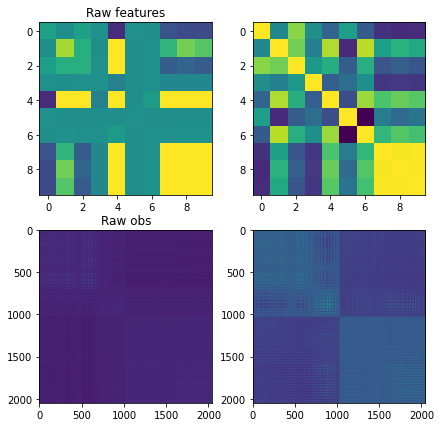

In [17]:
fig , ax = plt.subplots(2,2,figsize = (7,7))
ax[0,0].imshow(cov_features,vmin = -8e5,vmax=8e5)
ax[0,0].set_xticks = ([])
ax[0,0].set_yticks = ([])
ax[0,0].set_title('Raw features')

ax[0,1].imshow(cov_featuresZ)
ax[0,1].set_xticks = ([])
ax[0,1].set_xticks = ([])

ax[1,0].imshow(cov_observations)
ax[1,0].set_xticks = ([])
ax[1,0].set_xticks = ([])
ax[1,0].set_title('Raw obs')

ax[1,1].imshow(cov_observationsZ)
ax[1,1].set_xticks = ([])
ax[1,1].set_xticks = ([])

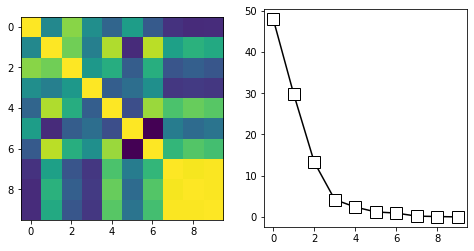

In [26]:
pca = PCA().fit(cloudz)

fog,ax = plt.subplots(1,2,figsize= (8,4))
ax[0].imshow(pca.get_covariance())
ax[1].plot(100*pca.explained_variance_ratio_,'ks-',markerfacecolor = 'w',markersize = 12)

plt.show()

Text(0, 0.5, 'PC2')

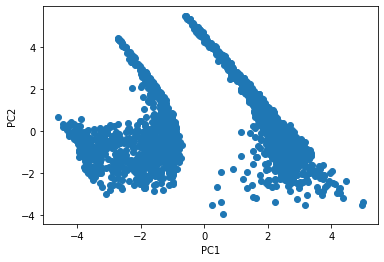

In [30]:
# project data down to 2 pcs

cloud2D = pca.transform(cloudz)
plt.plot(cloud2D[:,0],cloud2D[:,1],'o')
plt.xlabel('PC1')
plt.ylabel('PC2')

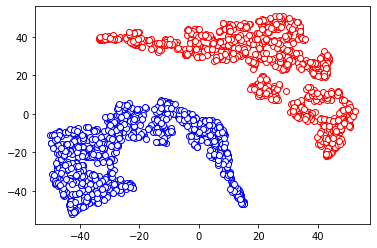

In [35]:
t = TSNE().fit_transform(cloudz)

# run-k means
clusters = KMeans(n_clusters=2).fit(t)

plt.plot(t[clusters.labels_ == 0,0],t[clusters.labels_ == 0,1],'ro',markerfacecolor = 'w')
plt.plot(t[clusters.labels_ == 1,0],t[clusters.labels_ == 1,1],'bo',markerfacecolor = 'w')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/p

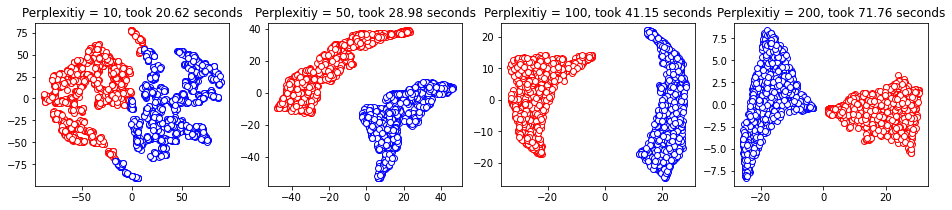

In [40]:
perps = [10,50,100,200]

fig,ax = plt.subplots(1,4,figsize=(16,3))
for i in range(4):
  #start timer
  starttime = time.clock()
  t = TSNE(perplexity=perps[i]).fit_transform(cloudz)
  clusters = KMeans(n_clusters=2).fit(t)
  # stop timeer
  endtime = time.clock()-starttime
  ax[i].plot(t[clusters.labels_ == 0,0],t[clusters.labels_ == 0,1],'ro',markerfacecolor = 'w')
  ax[i].plot(t[clusters.labels_ == 1,0],t[clusters.labels_ == 1,1],'bo',markerfacecolor = 'w')
  ax[i].set_title(f'Perplexitiy = {perps[i]}, took {endtime:.2f} seconds')

In [45]:
# re-run decomposition

t = TSNE(perplexity=10).fit_transform(cloudz)

#setup image
trange = np.arange(-100,100)
timage = np.zeros((len(trange),len(trange)))

# map sparse coord to dense matrix

for i in range(len(t)):
  xi = np.argmin((t[i,0]-trange)**2)
  yi = np.argmin((t[i,1]-trange)**2)
  timage[yi,xi] +=1

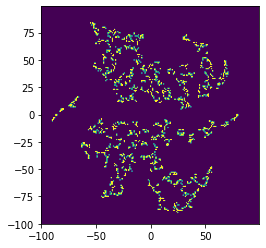

In [46]:
plt.imshow(timage,vmin = 0,vmax = 1,origin = 'top',extent = [trange[0],trange[-1],trange[0],trange[-1]])

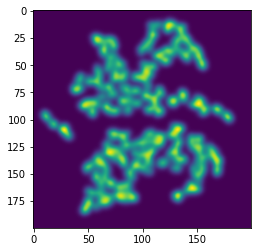

In [48]:
from scipy.ndimage import gaussian_filter

#smooth image

timage_smooth = gaussian_filter(timage,sigma = (3,3))

plt.imshow(timage_smooth)